# ⚡ Predicción de la Energía Eléctrica Generada en una Planta de Ciclo Combinado

## 1. 📦 Carga de datos

Importamos el dataset con las lecturas ambientales y la energía generada.


In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("CCPP_data.csv")
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## 2. 🧠 Información general y limpieza de datos

En esta sección exploramos el dataset para entender su estructura y calidad.
Vamos a revisar:

- Tipos de datos de cada columna.
- Cantidad de registros.
- Presencia de valores nulos.
- Estadísticas descriptivas básicas (media, desviación estándar, min, max).


In [3]:
# Ver estructura general del dataset
df.info()

# Mostrar estadísticas básicas
df.describe()

# Verificar si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,0
AT,0
V,0
AP,0
RH,0
PE,0


## 3. 📊 Análisis exploratorio de datos (EDA)

El objetivo aquí es entender cómo se distribuyen las variables y cómo se relacionan con la variable objetivo (`PE`).

Analizaremos:

- La distribución de cada variable mediante histogramas.
- La correlación entre variables con un mapa de calor.
- La relación directa entre cada feature y el target mediante gráficos de dispersión.


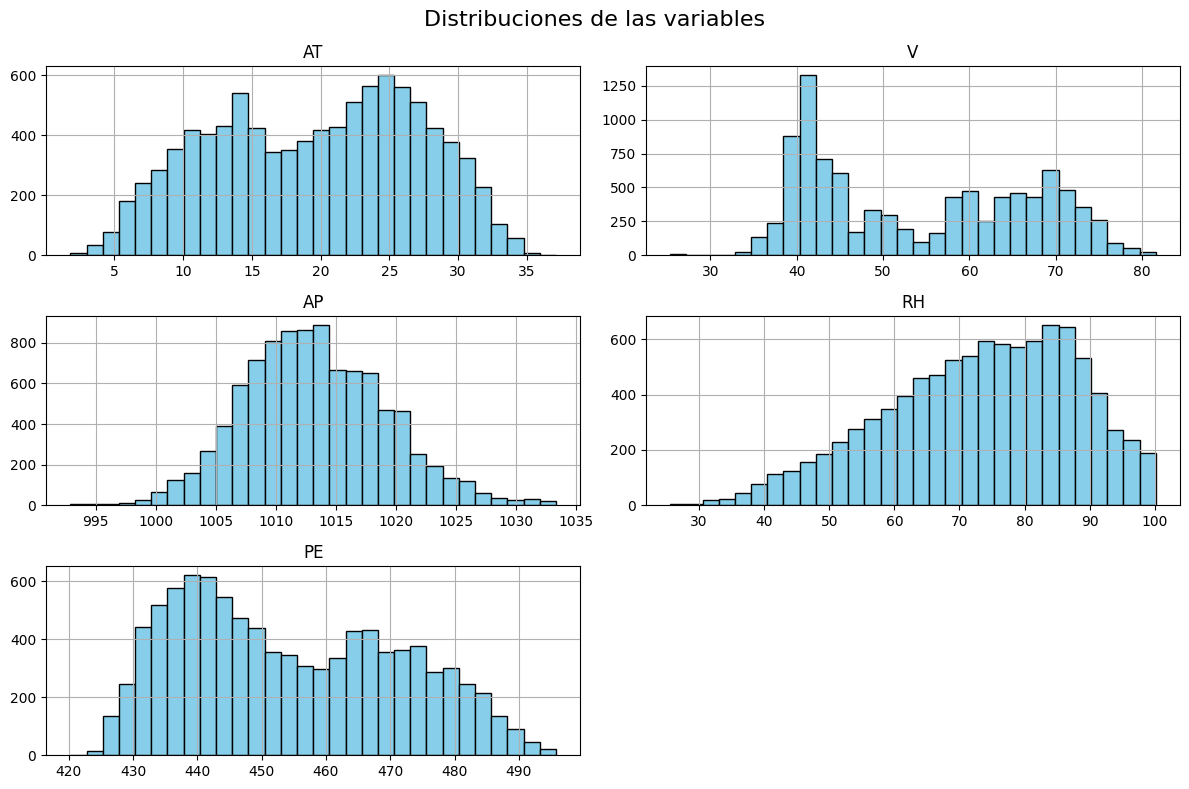

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de las variables
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribuciones de las variables", fontsize=16)
plt.tight_layout()
plt.show()


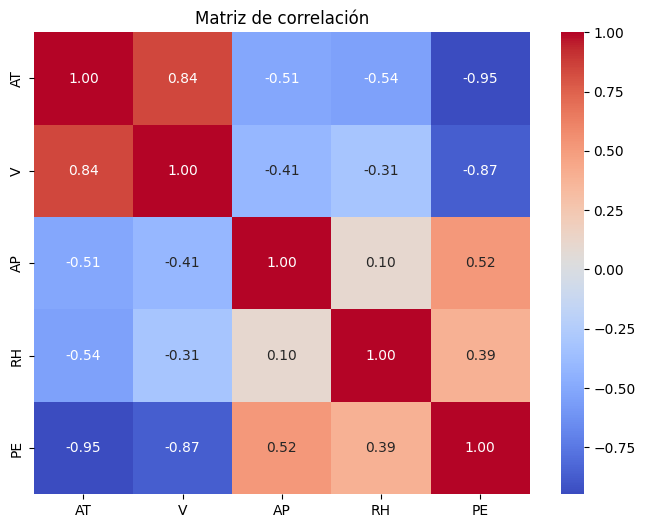

In [5]:
# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


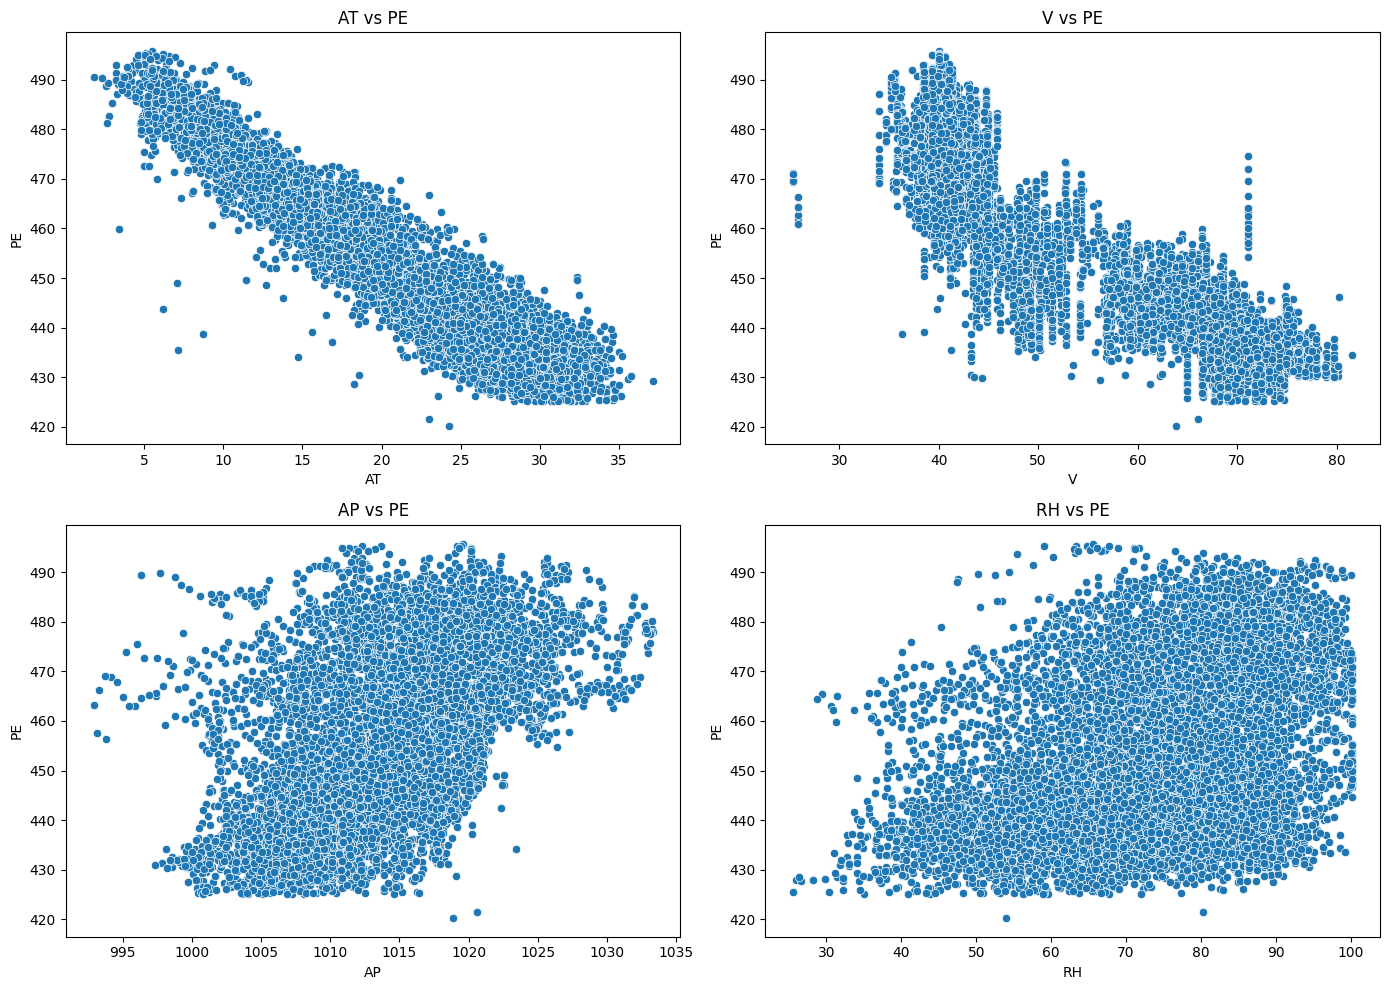

In [6]:
# Gráficos de dispersión entre cada feature y la variable objetivo
features = ['AT', 'V', 'AP', 'RH']

plt.figure(figsize=(14, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='PE', data=df)
    plt.title(f'{col} vs PE')

plt.tight_layout()
plt.show()


## 4. ✂️ División de datos: entrenamiento y prueba

Para evaluar el rendimiento del modelo de forma justa, separamos los datos en dos conjuntos:

- **Entrenamiento (80%)**: se utiliza para ajustar el modelo.
- **Prueba (20%)**: se reserva para evaluar el rendimiento final del modelo con datos no vistos.

La variable objetivo es `PE`, y las variables predictoras son: `AT`, `V`, `AP`, `RH`.


In [7]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y target
X = df.drop("PE", axis=1)
y = df["PE"]

# División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificar tamaños
print(f"Tamaño del set de entrenamiento: {X_train.shape}")
print(f"Tamaño del set de prueba: {X_test.shape}")


Tamaño del set de entrenamiento: (7654, 4)
Tamaño del set de prueba: (1914, 4)


## 5. 🧪 Comparación de modelos

Vamos a entrenar y comparar al menos dos modelos utilizando **validación cruzada (Cross Validation)** con 5 particiones (K-Fold):

- 🔹 **Regresión Lineal**: modelo base simple y fácil de interpretar.
- 🔹 **Random Forest Regressor**: modelo de conjunto robusto que captura relaciones no lineales.

La métrica principal que usamos durante la validación es **RMSE (Root Mean Squared Error)**.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Modelo de regresión lineal
lr = LinearRegression()

# Validación cruzada con RMSE negativo (se invierte el signo)
scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Promedio de los errores
print("Linear Regression RMSE (CV):", -np.mean(scores_lr))


Linear Regression RMSE (CV): 4.572397273712407


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Validación cruzada con RMSE
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Promedio de los errores
print("Random Forest RMSE (CV):", -np.mean(scores_rf))


Random Forest RMSE (CV): 3.4617887882106713


## 6. ✅ Evaluación del modelo final

Seleccionamos el modelo con mejor rendimiento durante la validación cruzada: **Random Forest**.

Ahora lo entrenamos con todo el conjunto de entrenamiento y lo evaluamos en el conjunto de prueba usando las siguientes métricas:

- **RMSE**: Raíz del error cuadrático medio
- **MAE**: Error absoluto medio
- **R²**: Coeficiente de determinación

También graficamos las predicciones vs los valores reales para observar la precisión del modelo.


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Entrenar el modelo con todo el set de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones sobre el set de prueba
y_pred = rf.predict(X_test)

# Calcular métricas corregidas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"RMSE en test: {rmse:.2f}")
print(f"MAE en test: {mae:.2f}")
print(f"R² en test: {r2:.4f}")


RMSE en test: 3.25
MAE en test: 2.33
R² en test: 0.9637


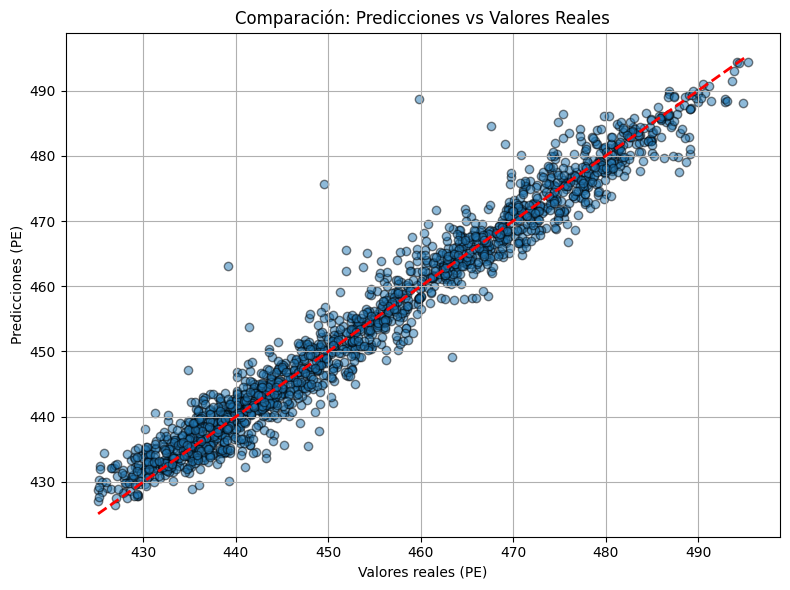

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales (PE)")
plt.ylabel("Predicciones (PE)")
plt.title("Comparación: Predicciones vs Valores Reales")
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. 🧾 Conclusión

- Se construyó un modelo de aprendizaje supervisado para predecir la energía eléctrica generada (`PE`) en una planta de ciclo combinado.
- Se compararon dos algoritmos:
  - 🔹 Regresión Lineal (baseline)
  - 🔹 Random Forest (modelo final seleccionado)
- Random Forest obtuvo el mejor desempeño, con un **RMSE de 3.25**, **MAE de 2.33** y un **R² de 0.9637** en el conjunto de prueba.
- La precisión del modelo lo convierte en una herramienta útil para estimar el output energético a partir de variables ambientales.
- Este enfoque puede ayudar a mejorar la eficiencia operativa de plantas de energía al anticipar variaciones de producción bajo distintas condiciones climáticas.
